<a href="https://colab.research.google.com/github/hasritha17/OasisInfobyte/blob/master/Sales_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#importing the dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/hasritha17/OasisInfobyte/master/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
#deleting the unnecessary column
del df['Unnamed: 0']
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
#getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
#checking the no.of missing values the dataset contains
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
#getting the statistical information about the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


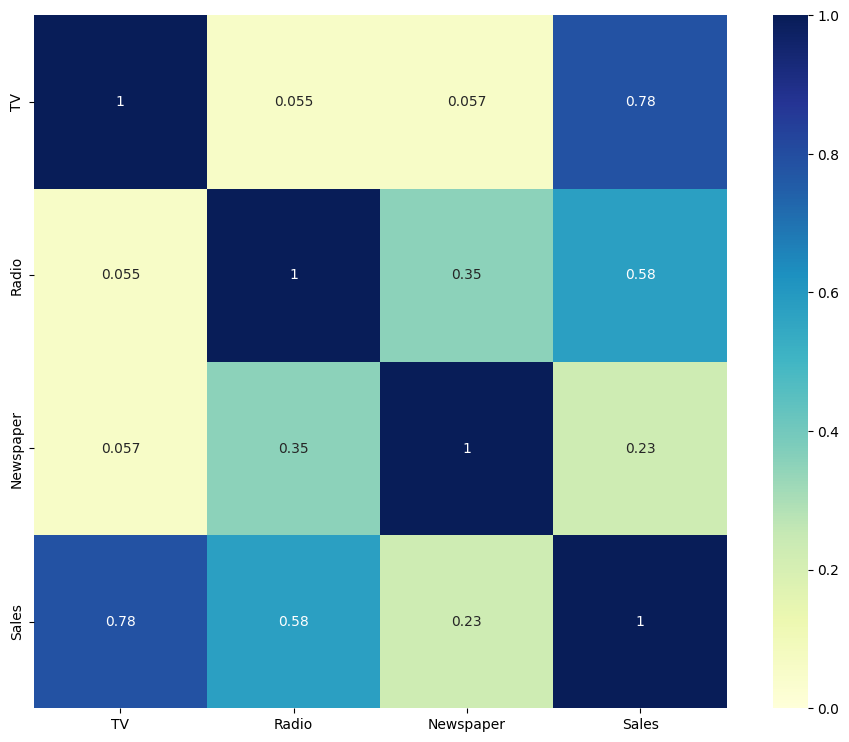

In [14]:
#getting the correlation heatmap for the dataset
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax,annot=True)
plt.show()

In [15]:
#finding the correlation of all features in the dataset
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


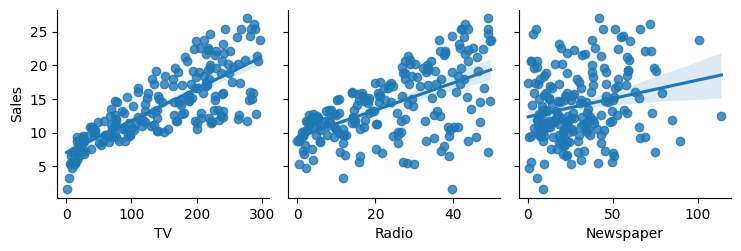

In [16]:
#checking the linearity assumption between each independent variable and the dependent variable
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

In [17]:
#dividing the dataset into dependent and independent variables
X = df.iloc[:,:3]
y = df.iloc[:,3]

In [18]:
#printing the independent variables
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
#printing the dependent variables
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [20]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
#getting the shapes of the splitted data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 3), (60, 3), (140,), (60,))

In [22]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
X_train

array([[ 1.46996987, -0.29400644, -1.44362356],
       [ 0.59673702,  0.30895675, -0.63372841],
       [ 0.69050699,  0.44063837,  0.29380514],
       [-0.70314919, -1.68012871, -1.04093826],
       [-1.4415877 ,  1.50102191,  1.67831864],
       [-0.0467594 , -0.34945133, -0.70612127],
       [ 0.33066473, -1.1880553 , -0.87805432],
       [-1.41580096, -0.57123089, -0.4482217 ],
       [-1.07705695,  1.57725864, -1.07261014],
       [ 1.02925101,  0.93271178, -0.00933997],
       [ 1.01987401, -0.58509211,  0.80055518],
       [-0.8414599 ,  1.40399335,  0.15354397],
       [ 0.35176297, -1.13954102,  0.13544575],
       [ 0.52406529,  1.36240968, -1.38027981],
       [ 0.49710643,  1.52181375,  1.19871592],
       [-1.36422748,  0.75251588,  1.5244838 ],
       [-1.54239042, -1.53458587, -1.41195169],
       [ 0.78076059, -1.31973692, -0.57943377],
       [ 0.67292512, -0.06529626, -0.81471057],
       [ 0.19235402, -1.49993282, -1.08165925],
       [ 0.89797305,  1.36240968, -0.226

In [25]:
X_test

array([[ 1.07730812e+00, -1.08409613e+00, -1.06356103e+00],
       [-7.58239048e-01, -9.31622683e-01, -1.18572399e+00],
       [-7.60583297e-01, -2.73214601e-01,  1.32827976e-02],
       [-5.21469874e-01, -1.58310015e+00, -1.12238023e+00],
       [ 1.64110006e+00, -9.80136962e-01, -4.88942687e-01],
       [ 1.12649549e-01, -1.59003076e+00, -3.57730623e-01],
       [-3.19864438e-01, -4.74202331e-01,  2.89280586e-01],
       [ 6.72925120e-01, -1.43755731e+00, -1.19024854e+00],
       [-1.57989841e+00,  3.92124091e-01, -1.03188916e+00],
       [ 1.29770941e-03, -1.54844710e+00, -1.04998737e+00],
       [ 9.41341659e-01,  6.20834267e-01,  2.57608709e-01],
       [ 5.24065292e-01, -2.24700322e-01, -4.61795363e-01],
       [-8.59041766e-01, -8.69247180e-01,  2.07838616e-01],
       [-8.07928760e-03, -1.53458587e+00, -2.53665883e-01],
       [ 1.78995989e+00,  2.81234309e-01,  4.97410066e-01],
       [ 2.73230623e-01,  8.70336276e-01, -1.12238023e+00],
       [ 1.72783728e+00,  1.30003418e+00

In [26]:
#fitting the linear regression model for the training data
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
#getting the coefficients
regression.coef_

array([ 4.01809918,  2.62510985, -0.10512677])

In [28]:
#getting the intercept
regression.intercept_

13.844285714285714

In [29]:
#predicting the sales values
y_pred=regression.predict(X_test)

In [30]:
#printing the predicted values
y_pred

array([15.43895387,  8.47664546, 10.06957187,  7.71114844, 17.91682229,
       10.16052442, 11.28379433, 12.8995467 ,  8.63394519,  9.89503809,
       19.22936644, 15.40871606,  8.08885196,  9.81003292, 21.72250192,
       17.34487399, 24.01131232, 10.15873635, 10.56553825, 15.57921389,
       17.38108426,  9.9798148 ,  9.44245625,  3.55242073,  8.78421243,
       12.04955642,  7.92186811, 12.02028147, 15.01794881, 20.57463951,
        4.4473578 , 20.36952625, 22.25958952, 15.7976842 , 21.05431523,
       17.44363633,  9.70506878, 11.33428663,  9.02641077, 14.1315286 ,
       21.75722864, 16.55298935, 21.84322802, 19.31683649, 23.06838012,
       14.84875525, 16.42847999, 17.44828745, 12.79387388,  8.27394975,
       11.15300073, 24.7234919 , 19.88096961, 15.27286988, 14.25571508,
        8.92487878, 16.68681587, 18.67023703, 18.46443733, 14.12729031])

In [31]:
#finding the mse, mae and rmse
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE ",mae)
print("RMSE: ",np.sqrt(mse))

MSE:  2.7401203834166554
MAE  1.3492423191714644
RMSE:  1.655330898466121


In [32]:
#computing r2 value
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9020126809698296

In [33]:
#computing adjusted r2 value
1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.9005128750663065